In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1

from torchvision.io import read_video

video, audio, info = read_video("/fsx/rs2517/data/HDTF/cropped_videos_original/WDA_ElijahCummings_000.mp4")

/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [19]:
import torch

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20)  # Keep everything as default

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained="vggface2").eval()


# Get cropped and prewhitened image tensor
img_cropped = mtcnn(video[:10])

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding = resnet(torch.stack(img_cropped))

In [20]:
img_embedding.shape

torch.Size([10, 512])

torch.Size([224, 224, 3])


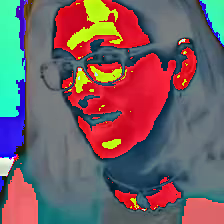

In [13]:
from PIL import Image

print(video[0].shape)
img = Image.fromarray(((video[0] + 1 / 2) * 255).numpy().astype("uint8"))
img

(170, 512, 3)


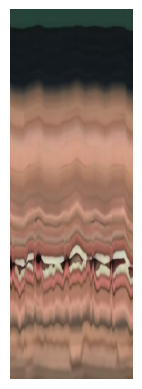

In [14]:
from torchvision.io import read_video

video, audio, info = read_video(
    "/data/home/antoni/results/for_paper/mead_ours_l2_vgg_cte_emo_pushed_updated/M030_video_front_fear_level_1_020.mp4",
    pts_unit="sec",
    output_format="TCHW",
)

import matplotlib.pyplot as plt
import numpy as np

# Convert video tensor to numpy array and normalize to 0-255 range
video_np = (video.numpy()).astype("uint8")

# Get middle x position
middle_x = video_np.shape[2] // 2

# Create xt slice by taking the middle x position across all frames
# Shape goes from [T,C,H,W] to [T,H,C]
xt_slice = video_np[:, :, :, middle_x].transpose(0, 2, 1)
print(xt_slice.shape)


# Create figure and plot
# plt.figure(figsize=(15,8))
plt.imshow(xt_slice.transpose(1, 0, 2))
# plt.title(f'XT slice at x={middle_x}')
# plt.xlabel('Time (frames)')
# plt.ylabel('Y position')
plt.axis("off")

plt.show()

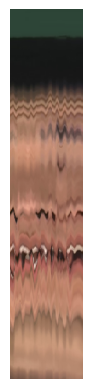

In [11]:
# Create figure and plot
# plt.figure(figsize=(15,8))
plt.imshow(xt_slice.transpose(1, 0, 2))
# plt.title(f'XT slice at x={middle_x}')
# plt.xlabel('Time (frames)')
# plt.ylabel('Y position')
plt.axis("off")

plt.show()